In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Clustering Assignment

HELP International is an international humanitarian NGO which has been able to raise around $ 10 million after a funding program. Now, NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. So,we have to categorise the countries using some socio-economic and health factors that determine the overall development of the country.

##  Task 1: Reading and Understanding the data

- ### Subtask 1.1: Read the Data.

In [3]:
# Read the csv file using 'read_csv'
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions and info of the different numeric columns.

In [5]:
df.shape

(167, 10)

In [6]:
df.info

<bound method DataFrame.info of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2    55.30   41.92   248.30    1610   
1                Albania        16.6  1145.20  267.90  1987.74    9930   
2                Algeria        27.3  1712.64  185.98  1400.44   12900   
3                 Angola       119.0  2199.19  100.60  1514.37    5900   
4    Antigua and Barbuda        10.3  5551.00  735.66  7185.80   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2  1384.02  155.92  1565.19    2950   
163            Venezuela        17.1  3847.50  662.85  2376.00   16500   
164              Vietnam        23.3   943.20   89.60  1050.62    4490   
165                Yemen        56.3   393.00   67.86   450.64    4480   
166               Zambia        83.1   540.20   85.99   451.14    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2      

In [7]:
# Brief the statistics of data
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,1056.732934,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,1801.409031,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##  Task 2: Exploratory Data Analysis

- ###  Subtask 2.1: Check the columns

In [9]:
# Check the data types of the columns
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [8]:
# missing values
round(100*(df.isnull().sum())/len(df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [4]:
# Changing the percentage value to numbers
df['exports'] = ((df['exports']/100)*df.gdpp).round(2)
df['imports'] = ((df['imports']/100)*df.gdpp).round(2)
df['health'] = ((df['health']/100)*df.gdpp).round(2)
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,1384.02,155.92,1565.19,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.85,2376.00,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.60,1050.62,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.86,450.64,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,540.20,85.99,451.14,3280,14.00,52.0,5.40,1460


- ###  Subtask 2.2: Visualize the columns

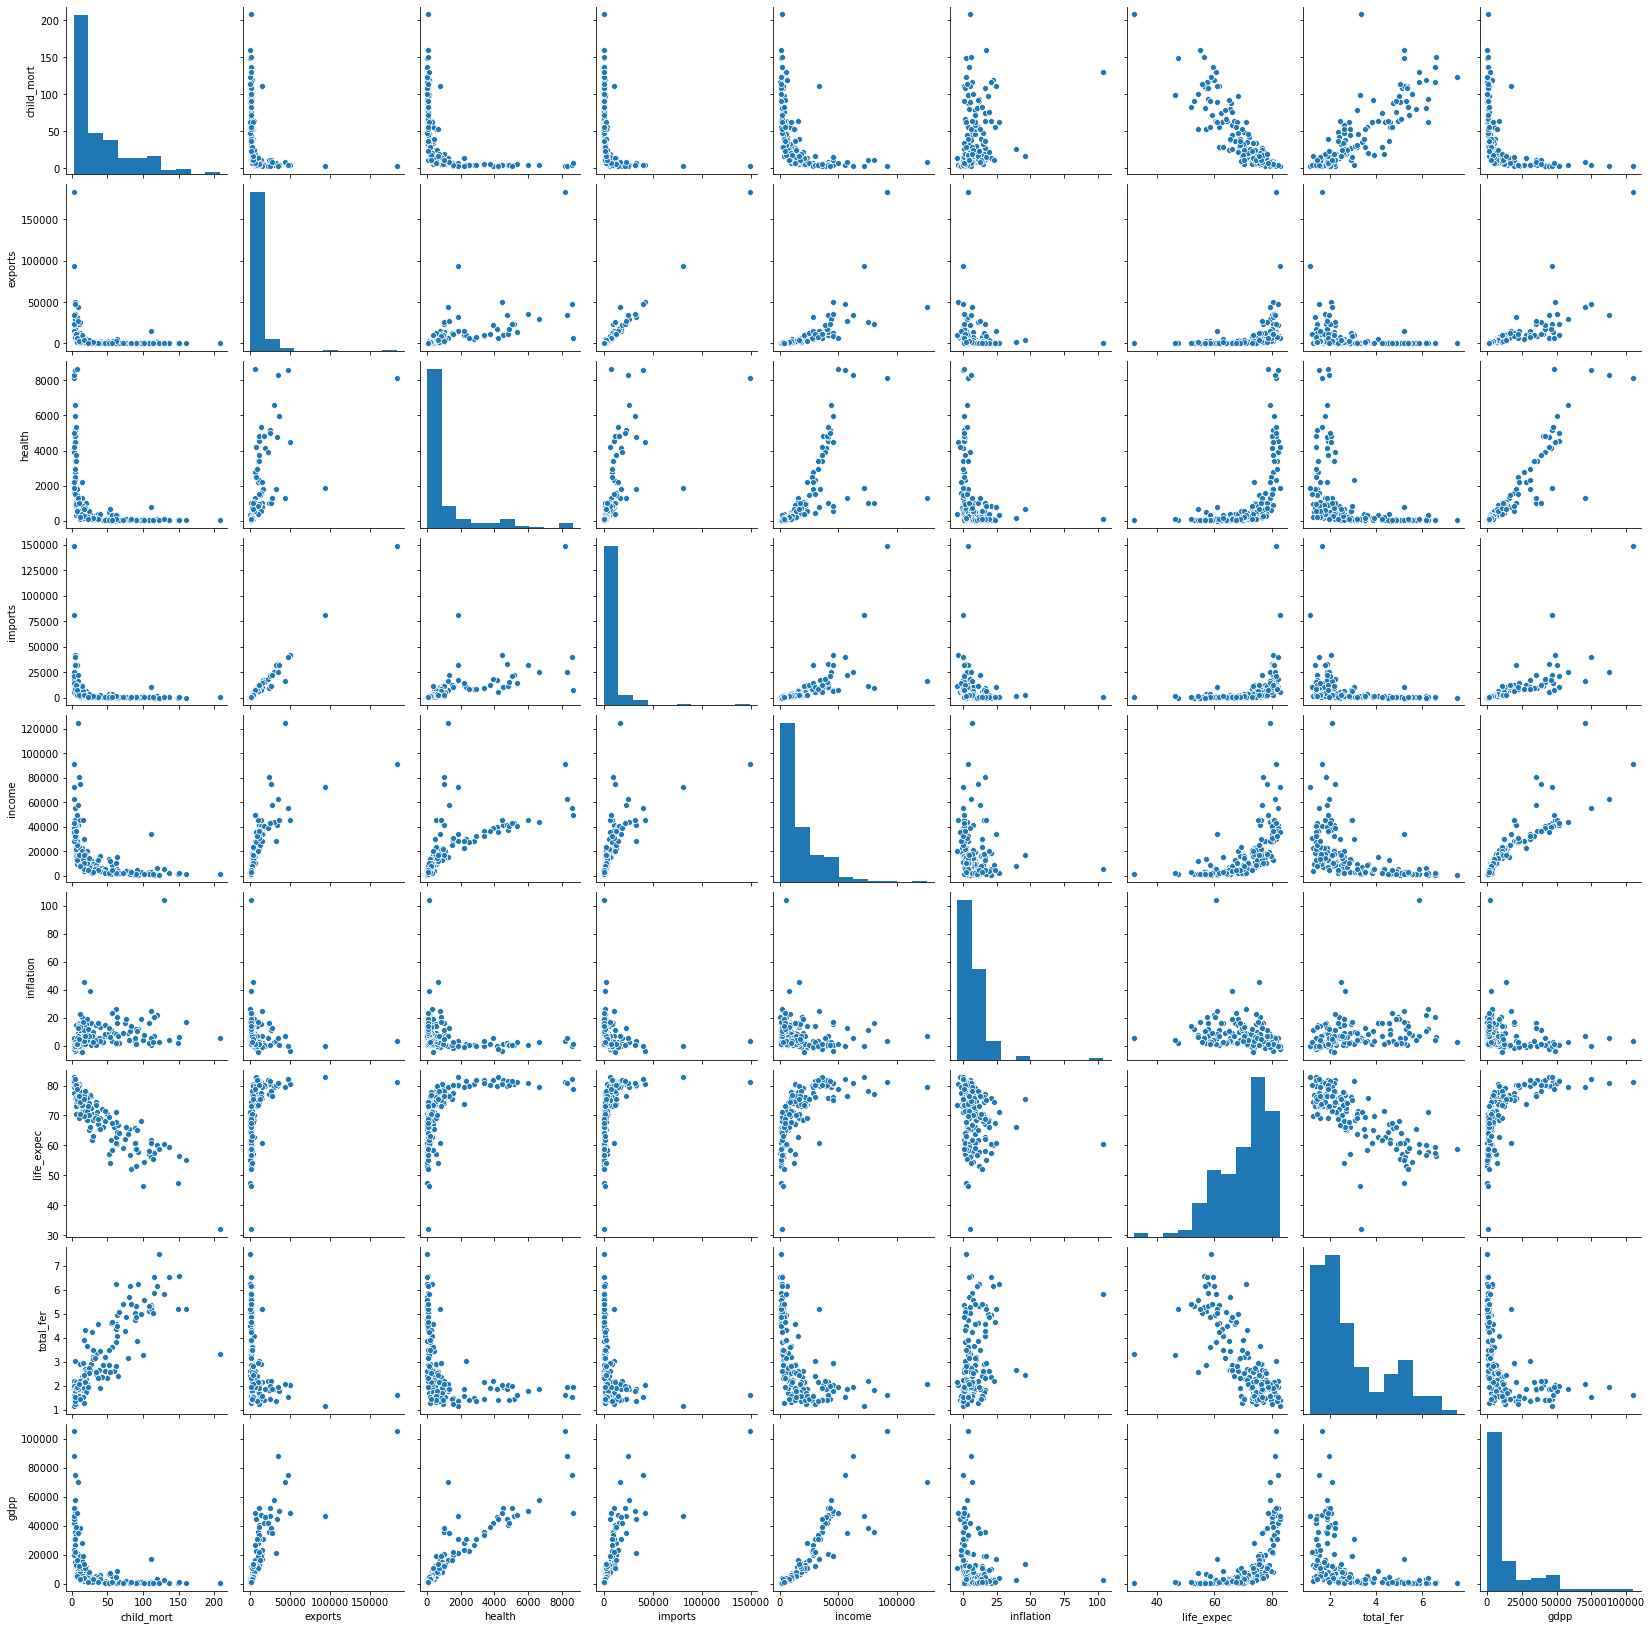

In [10]:
#Bivariate analysis
sns.pairplot(df[1:])
plt.show()

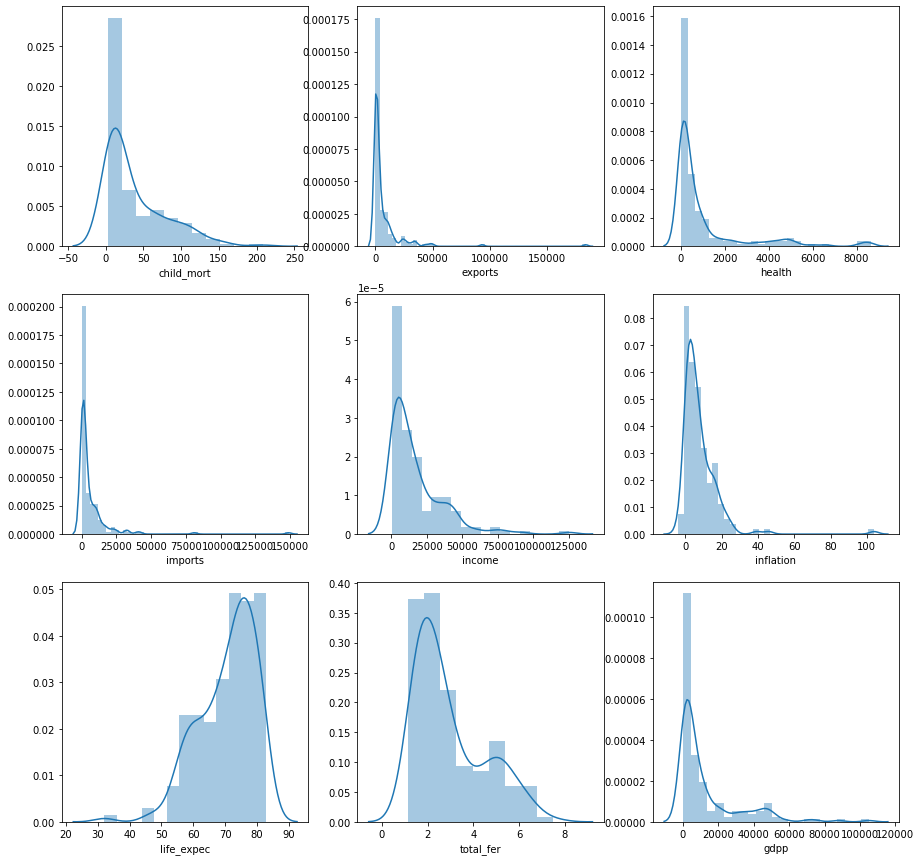

In [11]:
# Univariate Analysis
f = df.columns[1:]
plt.figure(figsize = (15,15))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

##  Task 3: Data Preparation for Clustering

- ###  Subtask 3.1: Outlier Treatment

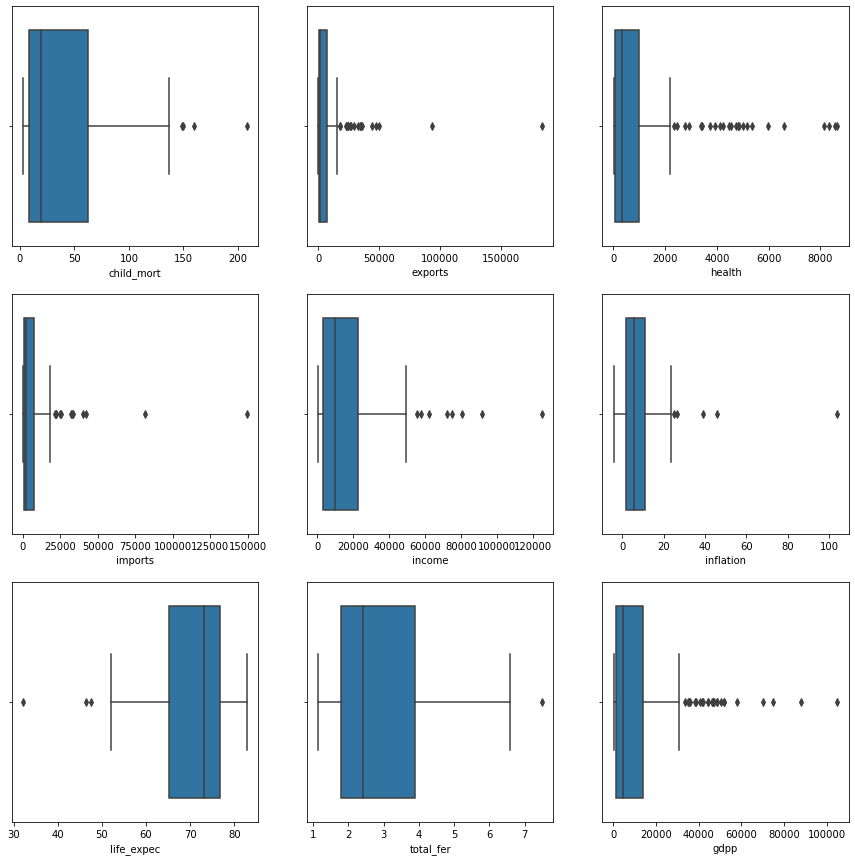

In [12]:
#check the outliers
f = df.columns[1:]
plt.figure(figsize = (15,15))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data = df)

There seems to be some outliers in the datasets but we can not remove them completely as those countries may have the need of aid. So, we will do soft capping as per the variables nature. 

- **Child_Mort & Inflation: We will not deal with upper range outliers but we will do capping to lower range outliers.**
- **For rest of the columns : We will ignore the lower range outliers but we will do capping upper range outliers.**

As there is no outlier in the lower range of Child_Mort & Inflation so we will leave both the column as it is.
But, we will treat the upper range outliers of rest of the columns by applying soft capping.

In [13]:
#Code for outlier treatment
# For exports column
q1 = df['exports'].quantile(0.99)
df['exports'][df['exports']>=q1]= q1

# For health column
q2 = df['health'].quantile(0.99)
df['health'][df['health']>=q2]= q2

# For imports column
q3 = df['imports'].quantile(0.99)
df['imports'][df['imports']>=q3]= q3

# For income column
q4 = df['income'].quantile(0.99)
df['income'][df['income']>=q4]= q4


# For gdpp column
q5 = df['gdpp'].quantile(0.99)
df['gdpp'][df['gdpp']>=q5]= q5


- ###  Subtask 3.2: Hopkins

The Hopkins statistic is a way of measuring the cluster tendency of a data set.A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

In [14]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [15]:
hopkins(df.drop('country', axis =1))

0.9067351937495125

- ###  Subtask 3.2: Scaling

We must perform scaling to our dataset before any modeling techniques as this will make all the data at same scale. And it is more important particulary is clustering as unscaled data points may joins another cluster

In [16]:
#apply Standardization for Scaling

ss = StandardScaler()
df1 = ss.fit_transform(df.drop('country', axis = 1))
df1

array([[ 1.29153238, -0.56962212, -0.56695614, ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.47385792, -0.44039042, ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.42399974, -0.48627175, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541, -0.49160668, -0.54025177, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.53995007, -0.5524278 , ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.52701632, -0.54227364, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

In [17]:
# Check the scaled data in Dataframe
df1 = pd.DataFrame(df1)
df1.columns = df.columns[:-1]
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-0.569622,-0.566956,-0.598740,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440390,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486272,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534091,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


##  Task 4: Cluster Formation

There are many techniques for cluster formation but here we will use KMean Clustering and Hierarchial Clustering.

##  Task 4.a : KMeans Clustering

In KMeans Clustering,here we will use Silhoutte Analysis and Elbow Curve Method to determine the k,

- ###  Subtask 4.a.1: Silhouette Analysis

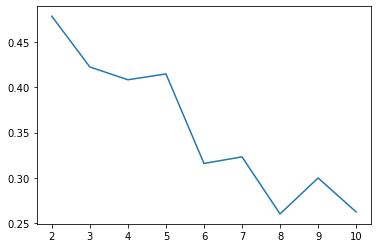

In [18]:
# Silhouette Analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])

sil =pd.DataFrame(ss)
plt.plot(sil[0], sil[1])

Higher silhouette score is consider as better so, from here we can determine k = 2 or 3. We will not take k=5 as 5 cluster is not good from a business point of view.

- ###  Subtask 4.a.2: Elbow Curve

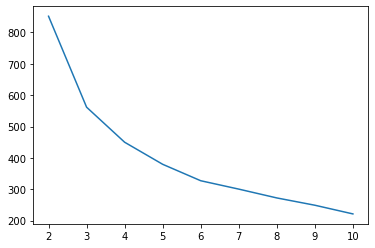

In [19]:
## Elbow Curve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

- In Elbow Curve, that number of cluster is considered where there is no significant change is observed.

So, by both the analysis we came to our conclusion of k as the value of 3. 

- ###  Subtask 4.a.3: KMean with k = 3

In [20]:
kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [21]:
kmean.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [22]:
df['cluster_id'] = kmean.labels_

In [23]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0,2


In [24]:
# Check the number of Data Points in each cluster
df.cluster_id.value_counts()

2    92
0    48
1    27
Name: cluster_id, dtype: int64

- ###  Subtask 4.a.4: Visualizing the Cluster

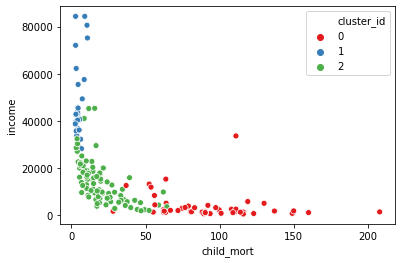

In [25]:
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id', data = df, palette ='Set1')

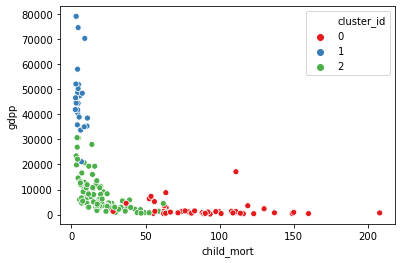

In [26]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_id', data = df, palette ='Set1')

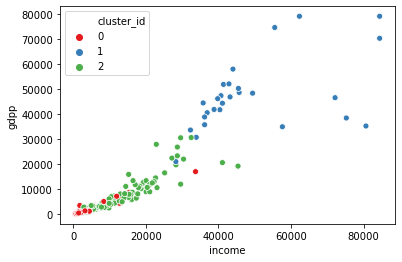

In [27]:
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'cluster_id', data = df, palette ='Set1')

- ###  Subtask 4.a.5: Cluster Profiling

We will do cluster profiling by keeping these parameter in consideration
- GDPP
- Income
- Child_Mort

So, we have to find that cluster for which we will have   **Low GDPP , Low Income and High Child_Mort**

In [29]:
# Check the mean of consideration columns
df[['child_mort', 'gdpp', 'income']].groupby(df['cluster_id']).mean()

,child_mort,gdpp,income
cluster_id,,,
0,91.610417,1909.208333,3897.354167
1,5.092593,47476.888889,49057.333333
2,20.177174,8226.869565,14169.456522


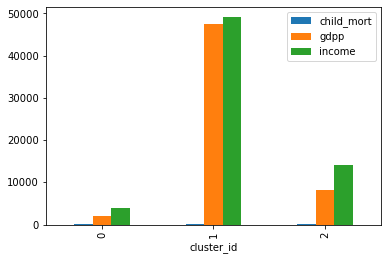

In [30]:
# Bargraph
df[['child_mort', 'gdpp', 'income']].groupby(df['cluster_id']).mean().plot(kind = 'bar')

So, considering Low GDPP,Low Income and High Child_Mort, we will select **cluster 0**

- ###  Subtask 4.a.6: Find the top aid countries

Once the cluster has been identified, you are required to find the top-5 countries that are actually in the requirement of the AID

In [31]:
# Name the selected cluster
c1 = df[df['cluster_id']==0]

In [32]:
# Sorting the selected cluster
c1.sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, False, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.61,26.80,90.55,764.0,12.30,57.7,6.26,231.0,0
88,Liberia,89.3,62.46,38.59,302.80,700.0,5.47,60.8,5.02,327.0,0
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609.0,20.80,57.5,6.54,334.0,0
112,Niger,123.0,77.26,17.96,170.87,814.0,2.55,58.8,7.49,348.0,0
132,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.20,399.0,0


## Task 4.b : Hierarchical Clustering

In Hierarchial Clustering, we will make dendrogram by single linkage as well as complete linkage. Then according to the dendrogram we will make cluster

In [33]:
#Scaled data
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-0.569622,-0.566956,-0.598740,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440390,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486272,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534091,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


- ###  Subtask 4.b.1: By Single Linkage

It is based on grouping clusters in bottom-up fashion (agglomerative clustering), at each step combining two clusters that contain the closest pair of elements not yet belonging to the same cluster as each other.

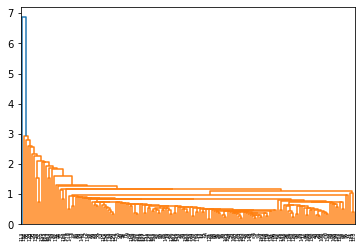

In [34]:
# single linkage
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

- ###  Subtask 4.b.2: By Complete Linkage

At the beginning of this process, each element is in a cluster of its own. The clusters are then sequentially combined into larger clusters until all elements end up being in the same cluster.

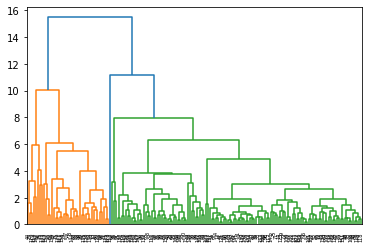

In [35]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

- ###  Subtask 4.b.3: Making of cluster

In Hierarchial Clustering, number of cluster is decided as per our choice. Then check the data point of cluster formed and decide the required number of cluster accordingly.

In [36]:
#  clusters
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [37]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900.0,16.10,76.5,2.89,4460.0,2,0
3,Angola,119.0,2199.19,100.60,1514.37,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100.0,1.44,76.8,2.13,12200.0,2,0


In [38]:
# Check the number of Data Points in each cluster
df.cluster_labels.value_counts()

0    126
1     41
Name: cluster_labels, dtype: int64

- ###  Subtask 4.b.4: Visualizing the Cluster

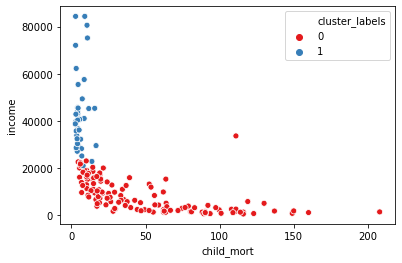

In [39]:
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_labels', data = df, palette ='Set1')

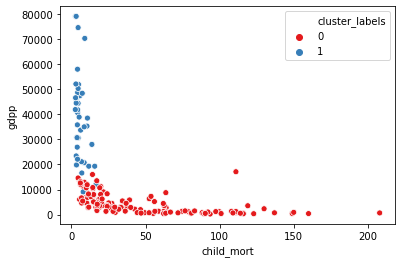

In [40]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_labels', data = df, palette ='Set1')

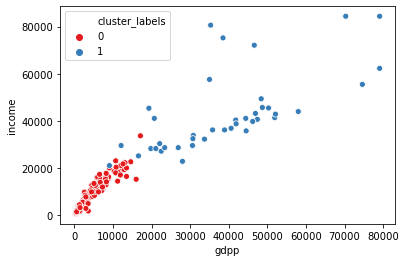

In [41]:
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_labels', data = df, palette ='Set1')

- ###  Subtask 4.b.5: Cluster Profiling

In [45]:
# Check the mean of consideration columns
df[['child_mort', 'gdpp', 'income']].groupby(df['cluster_labels']).mean()

,child_mort,gdpp,income
cluster_labels,,,
0,48.773016,4344.793651,8370.341270
1,5.992683,38608.439024,42940.195122


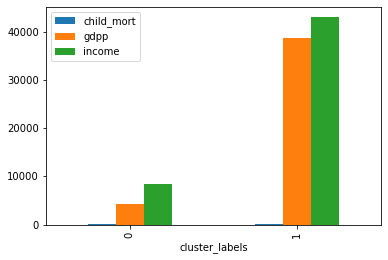

In [46]:
# Bargraph
df[['child_mort', 'gdpp', 'income']].groupby(df['cluster_labels']).mean().plot(kind = 'bar')

So, considering Low GDPP,Low Income and High Child_Mort, we will select **cluster 0**

- ###  Subtask 4.b.6: Find the top aid countries

Once the cluster has been identified, you are required to find the top-5 countries that are actually in the requirement of the AID

In [47]:
# Name the selected cluster
c2 = df[df['cluster_labels']==0]

In [49]:
# Sorting the selected cluster 
c2.sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, False, True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
26,Burundi,93.6,20.61,26.80,90.55,764.0,12.30,57.7,6.26,231.0,0,0
88,Liberia,89.3,62.46,38.59,302.80,700.0,5.47,60.8,5.02,327.0,0,0
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609.0,20.80,57.5,6.54,334.0,0,0
112,Niger,123.0,77.26,17.96,170.87,814.0,2.55,58.8,7.49,348.0,0,0
132,Sierra Leone,160.0,67.03,52.27,137.66,1220.0,17.20,55.0,5.20,399.0,0,0


**After analysing the data by both the Clustering Models, we came to our conclusion of the final list of countries.**

**1. Burundi**

**2. Liberia**

**3. Congo, Dem. Rep.**

**4. Niger**

**5. Sierra Leone**